In [ ]:
!pip install -q keras

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
import numpy as np

In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [ ]:
#intialising the CNN
classifier = Sequential()

In [ ]:
#Step 1 Conovolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation ='relu'))

In [ ]:
#Step 2 Pooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

In [ ]:
#Adding 2nd Convolution layer
classifier.add(Convolution2D(32, 3, 3, activation ='relu'))

In [ ]:
classifier.add(MaxPooling2D(pool_size = (2,2)))

In [ ]:
#Step 3 Flattening
classifier.add(Flatten())

In [ ]:
#Step 4 Full Connection
classifier.add(Dense(units= 128, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

In [ ]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#part 2 fitting the cnn to a image
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/cnn/Deep_Learning_A_Z/Volume 1 - Supervised Deep Learning/Part 2 - Convolutional Neural Networks (CNN)/Section 8 - Building a CNN/dataset/training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/cnn/Deep_Learning_A_Z/Volume 1 - Supervised Deep Learning/Part 2 - Convolutional Neural Networks (CNN)/Section 8 - Building a CNN/dataset/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

classifier.fit_generator(training_set,
        steps_per_epoch=23,
        epochs=18,
        validation_data=test_set,
        validation_steps=20)


Found 22 images belonging to 2 classes.
Found 22 images belonging to 2 classes.


<ipython-input-13-0a5270f4274e>:23: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(training_set,


Epoch 1/18
 1/23 [>.............................] - ETA: 36s - loss: 0.6967 - accuracy: 0.5000

23/23 [==============================] - 6s 183ms/step - loss: 0.6967 - accuracy: 0.5000 - val_loss: 0.6945 - val_accuracy: 0.5909


In [ ]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [ ]:
from tensorflow.keras.regularizers import l2

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.__version__

'2.9.2'

In [ ]:
# Part 2 - Building the CNN
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
#cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
## For Binary Classification
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))

In [ ]:
cnn.add(Dense(4, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='softmax'))
cnn.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:
# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 15)

Epoch 1/15
1/1 [==============================] - 2s 2s/step - loss: 1.0354 - accuracy: 0.0000e+00 - val_loss: 1.0351 - val_accuracy: 0.0000e+00
Epoch 2/15
1/1 [==============================] - 1s 734ms/step - loss: 1.0351 - accuracy: 0.0455 - val_loss: 1.0348 - val_accuracy: 0.0000e+00
Epoch 3/15
1/1 [==============================] - 1s 734ms/step - loss: 1.0348 - accuracy: 0.0455 - val_loss: 1.0345 - val_accuracy: 0.0000e+00
Epoch 4/15
1/1 [==============================] - 1s 824ms/step - loss: 1.0345 - accuracy: 0.0000e+00 - val_loss: 1.0342 - val_accuracy: 0.0000e+00
Epoch 5/15
1/1 [==============================] - 1s 753ms/step - loss: 1.0342 - accuracy: 0.0000e+00 - val_loss: 1.0338 - val_accuracy: 0.0000e+00
Epoch 6/15
1/1 [==============================] - 1s 751ms/step - loss: 1.0338 - accuracy: 0.0000e+00 - val_loss: 1.0335 - val_accuracy: 0.0000e+00
Epoch 7/15
1/1 [==============================] - 1s 749ms/step - loss: 1.0335 - accuracy: 0.0455 - val_loss: 1.0332 - val_

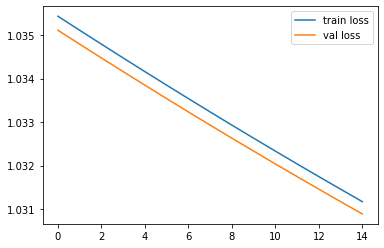

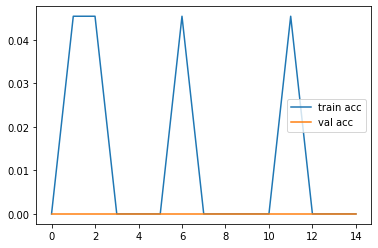

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model

cnn.save('model_rcat_dog.h5')

In [ ]:
from tensorflow.keras.models import load_model

# load model
model = load_model('model_rcat_dog.h5')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/cnn/Deep_Learning_A_Z/Volume 1 - Supervised Deep Learning/Part 2 - Convolutional Neural Networks (CNN)/Section 8 - Building a CNN/dataset/test_set/dogs/dog 12.webp', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

1/1 [==============================] - 0s 116ms/step


In [ ]:
result


array([[0.2662161 , 0.24923414, 0.24500057, 0.2395491 ]], dtype=float32)

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/cnn/Deep_Learning_A_Z/Volume 1 - Supervised Deep Learning/Part 2 - Convolutional Neural Networks (CNN)/Section 8 - Building a CNN/dataset/test_set/cats/cat 5.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

1/1 [==============================] - 0s 24ms/step


In [ ]:
result

array([[0.18735315, 0.24902143, 0.26813626, 0.2954891 ]], dtype=float32)